# Análisis de datos con Pyhon - Pre-entrega
Nombre y apellido: DE GARATE, ESTEBAN ALEJANDRO  
   
Comisión:   
  
.   



# Etapa 1

## Script básico
Actividades 2 y 3

In [ ]:
# Generamos una lista de diccionarios que contenga algunos datos
ventas = [
  {'producto': 'notebook', 'precio': 1500.0, 'cantidad': 3},
  {'producto': 'monitor', 'precio': 500.0, 'cantidad': 5},
  {'producto': 'mouse', 'precio': 20.0, 'cantidad': 15}
]

In [ ]:
# Calculamos las ventas acumuladas - map
venta_acumuladas = sum( map( lambda venta: venta["precio"] * venta["cantidad"], ventas))
venta_acumuladas

7300.0

In [ ]:
# Calculamos las ventas acumuladas - listas por comprensión
venta_acumuladas = sum( [venta["precio"] * venta["cantidad"] for venta in ventas])
venta_acumuladas

7300.0

## Import Datasets
Actividad 1

In [ ]:
import pandas as pd

In [96]:
# Import dataset ventas
df_ventas = pd.read_csv("https://github.com/alex-degarate/TT-2C2025-Data-Analitycs-Notebooks/raw/refs/heads/main/PreEntrega/Datasets/ventas.csv")


In [97]:
# Import dataset clientes
df_clientes = pd.read_csv("https://raw.githubusercontent.com/jrigottiedu/TT-2C2025-Data-Analitycs-Notebooks/refs/heads/main/PreEntrega/Datasets/clientes.csv")

In [98]:
# Import dataset marketing
df_marketing = pd.read_csv("https://raw.githubusercontent.com/jrigottiedu/TT-2C2025-Data-Analitycs-Notebooks/refs/heads/main/PreEntrega/Datasets/marketing.csv")

In [ ]:
df_ventas.head(30)

## Dataframe VENTAS

### Análisis exploratorio de **datos**
Actividad 4

Aplicamos los métodos de EDA vistos en clase, `info`, `columns`, `dtypes`, `head`, `tail`, `sample`, `unique`, `value_counts`, `describe`, `duplicated`, `isnull`, etc. y documentamos las observaciones:

In [102]:
# Aplicamos info() para familiarizarnos con el dataframe
df_ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3035 entries, 0 to 3034
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_venta     3035 non-null   int64  
 1   producto     3035 non-null   object 
 2   precio       3033 non-null   object 
 3   cantidad     3033 non-null   float64
 4   fecha_venta  3035 non-null   object 
 5   categoria    3035 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 142.4+ KB


In [ ]:
# Visualizamos los primeros registros con head()
# también podemos usar tail() para visualizar los últimos
df_ventas.head()

display(df_ventas.head())

In [104]:
# Usar sample() para tomar registros al azar
df_ventas.sample(5)

,id_venta,producto,precio,cantidad,fecha_venta,categoria
2340,2656,Laptop,$31.99,9.0,02/10/2024,Electrónica
1703,2991,Televisor,$92.33,4.0,15/07/2024,Electrónica
1783,2709,Proyector,$108.23,6.0,25/07/2024,Electrónica
36,17,Elementos de cerámica,$108.48,11.0,07/01/2024,Decoración
2685,431,Lámpara de mesa,$98.30,6.0,18/11/2024,Decoración


In [105]:
# Analizamos el campo precio
# Si es numericos se puede aplicar describe()
df_ventas["precio"].sample(5)

,precio
2258,$26.24
873,$42.59
82,$36.89
2035,$64.25
1415,$44.54


In [106]:
# Analizamos el campo cantidad
# si es numerico se puede aplicar describe()
df_ventas["cantidad"].sample(5)

,cantidad
1374,12.0
1925,3.0
108,3.0
2227,8.0
208,9.0


In [107]:
# Analizamos el campo fecha_venta
df_ventas["fecha_venta"].sample(5)

,fecha_venta
956,16/04/2024
2328,01/10/2024
474,24/02/2024
1119,03/05/2024
2094,01/09/2024


In [108]:
# Analizamos el campo categoria
# Probar con value_counts y unique
df_ventas["categoria"].value_counts()

,count
categoria,
Decoración,1015
Electrónica,1012
Electrodomésticos,1008


In [109]:
df_ventas["categoria"].unique()


array(['Decoración', 'Electrodomésticos', 'Electrónica'], dtype=object)

### Calidad de datos
Actividad 5

In [110]:
# Buscamos registros duplicados
df_ventas.duplicated().sum()

np.int64(35)

In [ ]:
# Visualizamos los duplicados
# keep: 'first', 'last', False
df_ventas[df_ventas.duplicated(keep=False)].sort_values(by="id_venta")

In [112]:
# Buscamos datos nulos
df_ventas.isnull().sum()

,0
id_venta,0
producto,0
precio,2
cantidad,2
fecha_venta,0
categoria,0


In [113]:

# Visualizar los nulos
# df_ventas[df_ventas.isnull().any(axis=1)]
nulos_lista = df_ventas[df_ventas.isnull().any(axis=1)]
df_ventas[df_ventas.isnull().any(axis=1)]

,id_venta,producto,precio,cantidad,fecha_venta,categoria
136,627,Elementos de cerámica,NaN,NaN,17/01/2024,Decoración
139,2171,Parlantes Bluetooth,NaN,NaN,17/01/2024,Electrónica


In [114]:
# Hay 2 registros con nulos, en el mismo registro, los campos "precio" y "cantidad son nulos
# No se pueden rescatar y van a ser eliminados
nulos_numero  = len(nulos_lista)
nulos_porcentaje = nulos_numero * 100 / len(df_ventas)
print(f"Numero de nulos: {nulos_numero } registros")
print(f"Porcentaje de nulos: {nulos_porcentaje:.2f}% registros")


Numero de nulos: 2 registros
Porcentaje de nulos: 0.07% registros


In [117]:
# Analizar los precios de los NaN a ver que opciones tenemos
# df_ventas[df_ventas["producto"]=="Elementos de cerámica"]
# df_ventas["producto"].value_counts()
df_ventas["producto"].unique()


array(['Cuadro decorativo', 'Lámpara de mesa', 'Secadora', 'Heladera',
       'Horno eléctrico', 'Plancha de vapor', 'Proyector',
       'Rincón de plantas', 'Candelabro', 'Aspiradora',
       'Freidora eléctrica', 'Tablet', 'Cortinas', 'Adorno de pared',
       'Jarrón decorativo', 'Lavadora', 'Auriculares', 'Cámara digital',
       'Cafetera', 'Consola de videojuegos', 'Smartphone',
       'Elementos de cerámica', 'Espejo decorativo',
       'Parlantes Bluetooth', 'SmartWatch', 'Microondas', 'Batidora',
       'Alfombra', 'Televisor', 'Laptop'], dtype=object)

### Observaciones




* Cantidad de registros originales: 3035
* Columnas/campos originales: 6
* 35 registros duplicados &emsp; => eliminarlos
*  2 registros con datos nulos: id:[136, 139], < 0.1 % total &emsp; =>  dropna
* Campo precio: tipo objeto con `$`, removerlo y luego cambiar el dtype a float64
* Campo fecha: ajustar a dtype datetime

## Dataframe MARKETING

### Analisis exploratorio de datos

Aplicamos los métodos de EDA vistos en clase, `info`, `columns`, `dtypes`, `head`, `tail`, `sample`, `unique`, `value_counts`, `describe`, `duplicated`, `isnull`, etc. y documentamos las observaciones:

In [118]:
# Aplicamos info() para familiarizarnos con el dataframe
df_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id_campanha   90 non-null     int64  
 1   producto      90 non-null     object 
 2   canal         90 non-null     object 
 3   costo         90 non-null     float64
 4   fecha_inicio  90 non-null     object 
 5   fecha_fin     90 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.3+ KB


In [119]:
# Visualizamos los primeros registros con head()
# también podemos usar tail() para visualizar los últimos
pd.set_option('display.max_rows', None)
df_marketing.head()

,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,Adorno de pared,TV,4.81,20/03/2024,03/05/2024
1,12,Tablet,RRSS,3.40,26/03/2024,13/05/2024
2,32,Lámpara de mesa,Email,5.54,28/03/2024,20/04/2024
3,21,Smartphone,RRSS,6.37,29/03/2024,16/05/2024
4,58,Alfombra,Email,4.25,31/03/2024,05/05/2024


In [120]:
# Analizamos el campo costo
df_marketing["costo"].sample(5)

,costo
66,4.78
79,4.99
80,5.62
59,5.74
17,3.68


In [121]:
# Analizamos el campo fecha_inicio
df_marketing["fecha_inicio"].sample(5)

,fecha_inicio
20,29/05/2024
44,02/08/2024
56,27/08/2024
48,13/08/2024
17,22/05/2024


In [122]:
# Analizamos el campo fecha_fin
df_marketing["fecha_fin"].sample(5)

,fecha_fin
39,01/08/2024
40,30/08/2024
12,28/05/2024
60,15/10/2024
68,16/11/2024


### Calidad de los datos


In [123]:
# Buscamos registros duplicados
df_marketing.duplicated().sum()

np.int64(0)

In [124]:
df_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id_campanha   90 non-null     int64  
 1   producto      90 non-null     object 
 2   canal         90 non-null     object 
 3   costo         90 non-null     float64
 4   fecha_inicio  90 non-null     object 
 5   fecha_fin     90 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.3+ KB


### Observaciones
El dataframe DF_MARKETING tiene 90 registros

No hay registros duplicados

El campo fecha_inicio es objeto &emsp; => cambiar a dtype datetime

El campo fecha_fin &emsp; es objeto &emsp; => cambiar a dtype datetime


## Dataframe CLIENTES

### Analisis exploratorio de datos

In [125]:
# Aplicamos info() para familiarizarnos con el dataframe
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cliente  567 non-null    int64  
 1   nombre      567 non-null    object 
 2   edad        567 non-null    int64  
 3   ciudad      567 non-null    object 
 4   ingresos    567 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 22.3+ KB


In [126]:
#df_clientes[500:]

In [127]:
# Visualizamos los primeros registros con head()
df_clientes.head(1)

,id_cliente,nombre,edad,ciudad,ingresos
0,1,Aloysia Screase,44,Mar del Plata,42294.68


In [128]:
# Buscamos registros duplicados
df_clientes.duplicated().sum()

np.int64(0)

In [129]:
# Buscamos datos nulos
df_clientes.isnull().sum()

,0
id_cliente,0
nombre,0
edad,0
ciudad,0
ingresos,0


### Observaciones
El dataframe CLIENTES tiene 567 registros.

No hay registros duplicados

No hay registros con valores nulos

El campo ciudad tiene ciudades con vocales acentuadas (poner vocales sin acento)

El campo nombre tiene nombres con apostrofe (poner vocales sin acento)

###Calidad de los datos

In [130]:
# visualizamos las ciudades con vocales acentuadas
# df_clientes["ciudad"].search()

# REVISAR ERROR

In [131]:
# ciudades con acentos áéíóúñ
ciudades_acentos = df_clientes[df_clientes["ciudad"].str.contains(r'[áéíóúñ]',regex=True)]

#display(ciudades_acentos.info())
# df_clientes[df_clientes["ciudad"].str.contains('á')].count()     # => 39
# df_clientes[df_clientes["ciudad"].str.contains('é')].count()     # => 0
# df_clientes[df_clientes["ciudad"].str.contains('í')].count()     # => 44
# df_clientes[df_clientes["ciudad"].str.contains('ó')].count()     # => 49
# df_clientes[df_clientes["ciudad"].str.contains('ú')].count()     # => 0

#ciudades_acentos.count()


In [ ]:
import re

def replace_accented(match):
    char = match.group(0)
    mapping = {'á': 'a', 'é': 'e', 'í': 'i', 'ó': 'o', 'ú': 'u'}
    return mapping.get(char, char)

# 1 y 2 funcionan OK
# 1 df_clientes['city_normal'] = df_clientes['ciudad'].str.replace(r'[áéíóú]', replace_accented, regex=True)
df_clientes['city_normal'] = df_clientes['ciudad'].str.replace(r'[áéíóú]', lambda match: replace_accented(match), regex=True)
'''
df_clientes['city_normal'] = df_clientes['ciudad'].str.replace('á','a')
df_clientes['city_normal'] = df_clientes['ciudad'].str.replace('é','e')
df_clientes['city_normal'] = df_clientes['ciudad'].str.replace('í','i')
df_clientes['city_normal'] = df_clientes['ciudad'].str.replace('ó','o')
df_clientes['city_normal'] = df_clientes['ciudad'].str.replace('ú','u')
'''
display(df_clientes.loc[100:110,['ciudad', 'city_normal']].sample(10))


In [133]:
# nombres con apostrofes u otros
# Este busca caracteres distintos de letras y espacio
df_clientes[df_clientes["nombre"].str.strip().str.contains(r"[^a-zA-Z\s+]", regex=True)].count()

# ESte busca especificamente por apostrofe, guion medio y punto
#metodo2 = df_clientes[df_clientes["nombre"].str.contains(r"['-.]", regex=True)].count()

#print(f"Metodo 1:\n {metodo1}")
#print(f"\nMetodo 2:\n {metodo2}")



,0
id_cliente,15
nombre,15
edad,15
ciudad,15
ingresos,15
city_normal,15


# Etapa 2

## Limpieza de datos
Actividad 1 - Limpiar el conjunto de datos eliminando duplicados y caracteres no deseados. Documentar el proceso y los resultados.

### Dataframe ventas

* 35 duplicados, eliminarlos - se eliminaron 35 duplicados &emsp; => Ok
* Algunos nulos (2), 1% del faltante, dropna - se eliminaron 2 registros con 2 NaN
* Campo precio: encontre `$`, removerlo y luego cambiar el dtype a float64 - Ok
* Campo fecha: ajustar a dtype datetime - Ok

In [134]:
# Eliminamos registros duplicados
# atributos a evaluar, keep, ignore_index, inplace
df_ventas.drop_duplicates(inplace=True, ignore_index=True)

In [135]:
# Validamos que no haya duplicados
df_ventas.duplicated().sum()

np.int64(0)

In [136]:
# Eliminamos registros con datos nulos
df_ventas.dropna(inplace=True)

In [137]:
# Validamos que no haya nulos
# df_ventas.isnull().sum()
df_ventas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2998 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_venta     2998 non-null   int64  
 1   producto     2998 non-null   object 
 2   precio       2998 non-null   object 
 3   cantidad     2998 non-null   float64
 4   fecha_venta  2998 non-null   object 
 5   categoria    2998 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 164.0+ KB


In [138]:
# Eliminamos el caracter especial $ de precio
# Normalización: usar replace()
# De ser necesario, podemos usar el atributo regex=True
df_ventas["precio"] = df_ventas["precio"].str.strip().str.replace("$", "")

In [139]:
# Validamos que precio no contenga $
df_ventas["precio"].sample(3)

,precio
2448,78.28
158,85.23
1172,85.59


In [141]:
# Convertimos precio de str a float
# Podemos usar pd.to_numeric o astype o incluso combinarlos
df_ventas["precio"] = df_ventas["precio"].astype(float)


In [142]:
# Convertir el dtype de cantidad, de float64 a int64
df_ventas["cantidad"]= df_ventas["cantidad"].astype(int)

In [143]:
# Validar la conversion a int
df_ventas["cantidad"].dtypes


dtype('int64')

In [144]:
# Validamos campos numericos
df_ventas[["precio","cantidad"]].sample(3)

,precio,cantidad
355,59.33,5
1068,107.95,1
1064,38.03,11


In [145]:
# Convertir el campo fecha_venta a dtype datetime
# pd.to_datetime(df_ventas["fecha_venta"], format="%d/%m/%Y")
# pd.to_datetime(df_ventas["fecha_venta"], dayfirst=True)
df_ventas['fecha_venta'] = pd.to_datetime(df_ventas['fecha_venta'], format="%d/%m/%Y")

In [302]:
# Validar la conversion de fecha
#df_ventas['fecha_venta'].dtype




In [300]:
# Renombrar ventas["precio"] a ventas["precio_unit"]  porque me resulta confuso
df_ventas.rename(columns={"precio": "precio_unit"}, inplace=True)

In [304]:
# Validar cambios
df_ventas.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2998 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id_venta     2998 non-null   int64         
 1   producto     2998 non-null   object        
 2   precio_unit  2998 non-null   float64       
 3   cantidad     2998 non-null   int64         
 4   fecha_venta  2998 non-null   datetime64[ns]
 5   categoria    2998 non-null   object        
 6   valor_venta  2998 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 187.4+ KB


In [311]:
df_ventas_final = df_ventas.copy()
#df_ventas_final.to_csv('df_ventas_final.csv', index=False)

In [312]:
df_ventas_final.head()


,id_venta,producto,precio_unit,cantidad,fecha_venta,categoria,valor_venta
0,792,Cuadro decorativo,69.94,5,2024-01-02,Decoración,349.70
1,811,Lámpara de mesa,105.10,5,2024-01-02,Decoración,525.50
2,1156,Secadora,97.96,3,2024-01-02,Electrodomésticos,293.88
3,1372,Heladera,114.35,8,2024-01-02,Electrodomésticos,914.80
4,1546,Secadora,106.21,4,2024-01-02,Electrodomésticos,424.84


VENTAS  
El df_ventas_final contiene 2998 registros  
   

   

.  
  

================================================================================
  


### Dataframe marketing

ACCIONES

Convertir el campo fecha_inicio a dtype = datetime  
Convertir el campo fecha_fin    a dtype = datetime

In [148]:
# Convertir el campo fecha_inicio a dtype datetime
df_marketing['fecha_inicio'] = pd.to_datetime(df_marketing['fecha_inicio'], format="%d/%m/%Y")

In [149]:
# Convertir el campo fecha_fin a dtype datetime
df_marketing['fecha_fin'] = pd.to_datetime(df_marketing['fecha_fin'], format="%d/%m/%Y")

In [150]:
# Validamos los cambios
df_marketing[["fecha_inicio","fecha_fin"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   fecha_inicio  90 non-null     datetime64[ns]
 1   fecha_fin     90 non-null     datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 1.5 KB


In [157]:
# Hacemos una copia del df_marketing
df_marketing_final = df_marketing.copy()

# Guardamos la copia a disco
df_marketing_final.to_csv('df_marketing_final.csv', index=False)

df_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id_campanha   90 non-null     int64         
 1   producto      90 non-null     object        
 2   canal         90 non-null     object        
 3   costo         90 non-null     float64       
 4   fecha_inicio  90 non-null     datetime64[ns]
 5   fecha_fin     90 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 4.3+ KB


In [ ]:
df_marketing.head(90)

   
   
### Dataframe clientes  


In [152]:
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_cliente   567 non-null    int64  
 1   nombre       567 non-null    object 
 2   edad         567 non-null    int64  
 3   ciudad       567 non-null    object 
 4   ingresos     567 non-null    float64
 5   city_normal  567 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 26.7+ KB


In [153]:
df_clientes.head()


,id_cliente,nombre,edad,ciudad,ingresos,city_normal
0,1,Aloysia Screase,44,Mar del Plata,42294.68,Mar del Plata
1,2,Kristina Scaplehorn,25,Posadas,24735.04,Posadas
2,3,Filip Castagne,50,Resistencia,35744.85,Resistencia
3,4,Liuka Luard,39,Bahía Blanca,27647.96,Bahia Blanca
4,5,Dore Cockshtt,28,Rosario,28245.65,Rosario


In [154]:
# Hacemos una copia del df_clientes
df_clientes_final = df_clientes.copy()

# Guardamos la copia a disco
# df_clientes_final.to_csv('df_clientes_final.csv', index=False)

# Transformación de datos
Actividad 2 - Aplicar filtros y transformaciones para crear una tabla de ventas que muestre solo los productos con alto rendimiento.

In [308]:
df_ventas_final.head(2)

,id_venta,producto,precio_unit,cantidad,fecha_venta,categoria,valor_venta
0,792,Cuadro decorativo,69.94,5,2024-01-02,Decoración,349.7
1,811,Lámpara de mesa,105.10,5,2024-01-02,Decoración,525.5


In [309]:
# Transformación:
# Calculamos el valor de cada venta = precio * cantidad

# Agregamos una nueva columna  valor_venta = monto
df_ventas_final["valor_venta"] = df_ventas_final["precio_unit"] * df_ventas["cantidad"]

In [310]:
# Visualizamos
df_ventas_final.head(2)

,id_venta,producto,precio_unit,cantidad,fecha_venta,categoria,valor_venta
0,792,Cuadro decorativo,69.94,5,2024-01-02,Decoración,349.7
1,811,Lámpara de mesa,105.10,5,2024-01-02,Decoración,525.5


In [316]:
# Agregación:
# Agrupar valor_venta por producto
# Sumamos las ventas dentro de cada grupo
tabla_ventas = (df_ventas.groupby("producto", as_index=False)["valor_venta"].sum())
tabla_ventas.head()

,producto,valor_venta
0,Adorno de pared,48093.49
1,Alfombra,44773.06
2,Aspiradora,50085.86
3,Auriculares,74175.58
4,Batidora,50979.20


In [317]:
# Usemos describe para analizar algunos valores del dataframe resultante
tabla_ventas.describe()

,valor_venta
count,30.000000
mean,48903.117333
std,13265.561715
min,11128.800000
25%,45601.920000
50%,48140.245000
75%,51092.960000
max,82276.380000


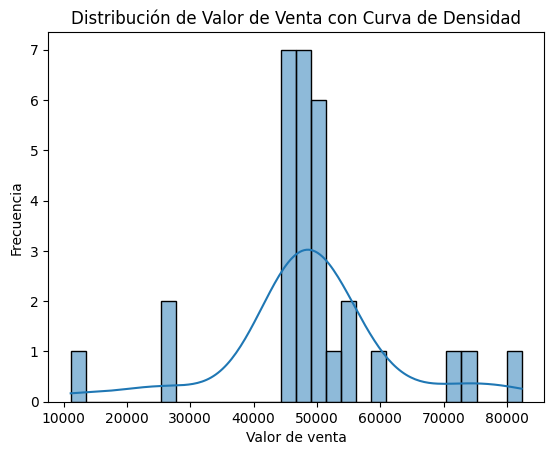

In [318]:
# Agregamos un plot para visualizar graficamente la distribución
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(tabla_ventas["valor_venta"], bins=30, kde=True, edgecolor="black")
plt.title("Distribución de Valor de Venta con Curva de Densidad")
plt.xlabel("Valor de venta")
plt.ylabel("Frecuencia")
plt.show()

### Alto Rendimiento
Los productos de alto rendimiento son aquellos que maximizan su utilidad, rentabilidad o eficiencia (se tomará quartil 75 )

In [319]:
# Calcular el percentil 75 (umbral de alto rendimiento)
umbral_ventas = tabla_ventas["valor_venta"].quantile(0.75)
umbral_ventas

np.float64(51092.96)

In [341]:
# Identificar productos que superan el umbral
# productos_top = tabla_ventas.query("valor_venta >= @umbral")
productos_top = tabla_ventas[tabla_ventas["valor_venta"] >= umbral_ventas]
productos_top

,producto,valor_venta
3,Auriculares,74175.58
5,Cafetera,59607.31
9,Cuadro decorativo,54297.60
16,Jarrón decorativo,51130.88
19,Lámpara de mesa,82276.38
20,Microondas,72562.89
25,Secadora,52115.45
27,Smartphone,54132.44


## Agregación
Actividad 3 - Resumir las ventas por categoría de producto y analizar los ingresos generados.

In [342]:
df_ventas.columns

Index(['id_venta', 'producto', 'precio_unit', 'cantidad', 'fecha_venta',
       'categoria', 'valor_venta'],
      dtype='object')

In [343]:
# Agrupamos por categoria y agregamos el total valor_venta por categoria
# (solo son 3 categorías )
ventas_categoria = df_ventas.groupby("categoria", as_index=False)["valor_venta"].sum()
ventas_categoria.head()

,categoria,valor_venta
0,Decoración,479216.09
1,Electrodomésticos,505299.63
2,Electrónica,482577.80


In [345]:
# Ordenar y mostrar los resultados
ventas_categoria.sort_values(by="valor_venta", ascending=False, inplace=True)
#ventas_categoria

.  


## Integración de datos
Actividad 4 - Combinar los sets de datos de ventas y marketing para obtener una visión más amplia de las tendencias.

In [324]:
df_ventas_final.head(2)

,id_venta,producto,precio_unit,cantidad,fecha_venta,categoria,valor_venta
0,792,Cuadro decorativo,69.94,5,2024-01-02,Decoración,349.7
1,811,Lámpara de mesa,105.10,5,2024-01-02,Decoración,525.5


In [339]:
# df_marketing.info()

df_marketing.head()


,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,Adorno de pared,TV,4.81,2024-03-20,2024-05-03
1,12,Tablet,RRSS,3.40,2024-03-26,2024-05-13
2,32,Lámpara de mesa,Email,5.54,2024-03-28,2024-04-20
3,21,Smartphone,RRSS,6.37,2024-03-29,2024-05-16
4,58,Alfombra,Email,4.25,2024-03-31,2024-05-05


In [337]:

#df_marketing2 = df_marketing.sort_values(by="producto", ascending=True)
df_marketing.head(6)

,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,Adorno de pared,TV,4.81,2024-03-20,2024-05-03
1,12,Tablet,RRSS,3.40,2024-03-26,2024-05-13
2,32,Lámpara de mesa,Email,5.54,2024-03-28,2024-04-20
3,21,Smartphone,RRSS,6.37,2024-03-29,2024-05-16
4,58,Alfombra,Email,4.25,2024-03-31,2024-05-05
5,85,SmartWatch,TV,5.07,2024-04-01,2024-05-05


In [346]:
# Unir los datasets ventas y marketing por columna 'producto'
ventas_marketing = pd.merge(df_ventas_final, df_marketing, on="producto", how="left")

In [348]:
# Verificar coincidencias (muestra)
ventas_marketing.head(6)

,id_venta,producto,precio_unit,cantidad,fecha_venta,categoria,valor_venta,id_campanha,canal,costo,fecha_inicio,fecha_fin
0,792,Cuadro decorativo,69.94,5,2024-01-02,Decoración,349.7,1,RRSS,5.27,2024-04-27,2024-06-04
1,792,Cuadro decorativo,69.94,5,2024-01-02,Decoración,349.7,31,Email,5.28,2024-08-15,2024-09-12
2,792,Cuadro decorativo,69.94,5,2024-01-02,Decoración,349.7,61,TV,5.30,2024-11-05,2024-12-23
3,811,Lámpara de mesa,105.10,5,2024-01-02,Decoración,525.5,32,Email,5.54,2024-03-28,2024-04-20
4,811,Lámpara de mesa,105.10,5,2024-01-02,Decoración,525.5,2,RRSS,5.88,2024-05-30,2024-06-29
5,811,Lámpara de mesa,105.10,5,2024-01-02,Decoración,525.5,62,TV,4.51,2024-08-26,2024-10-07


### Analizamos el impacto de la campaña

In [ ]:
# Nos quedamos solo con los registros de ventas durante la campaña de marketing
# Seleccionamos solo los campos que nos interesan: "producto", "valor_venta", "costo"
ventas_campaing = ventas_marketing[["producto", "valor_venta", "costo"]]
ventas_campaing.head()

In [ ]:
# Agrupamos por producto y hacemos una agregación por "valor de venta" y "costo"
ventas_marketing.groupby("categoria")[["valor_venta","costo"]].sum()

In [ ]:
# Generamos una nueva columna con la diferencia entre lo vendido y lo invertido en la campaña


================================================================================
## PROBABLES MEJORAS A FUTURO
1 Crear lista categorias = df_ventas_final["categoria"].unique()  

2 Crear tabla df_producto con id_producto, producto, id_categoria, categoria

Se observo:
1. Las ventas contienen productos con la misma denominacion, sin ninguna id como para identificarlos. Pertenecen a distintas ventas individuales y tienen distinto precio.

2. Por tal razon es dificil hacer una evaluacion seria del resultado de la campaña publicitaria, porque corresponde a distintos productos agregados, con precio sin adjudicar.

3. La campaña de marketing posee el costo publicitario por producto (generico/agregado) pero no hay como relacionarlo con el costo_unitario, ni con el precio_venta

4. Sacar un precio_promedio no estoy seguro que sirva mucho porque la venta podria haberse hecho a un valor menor que el precio_unitario_promedio
  


In [ ]:
df_pp_ventas = df_ventas_final.copy()
df_pp_ventas.rename(columns={"precio": "precio_unit"}, inplace=True)

In [ ]:
#df_pp_ventas[ df_pp_ventas["producto"] == "Adorno de pared"].count()
# "producto"] == "Adorno de pared"] hay => 100
# df_pp_ventas.sort_values(by="producto", ascending=True, inplace=False)

df_pp_ventas[ df_pp_ventas["producto"] == "Adorno de pared"]

In [223]:
df_pp_ventas.head()

,id_venta,producto,precio_unit,cantidad,fecha_venta,categoria
0,792,Cuadro decorativo,69.94,5,2024-01-02,Decoración
1,811,Lámpara de mesa,105.10,5,2024-01-02,Decoración
2,1156,Secadora,97.96,3,2024-01-02,Electrodomésticos
3,1372,Heladera,114.35,8,2024-01-02,Electrodomésticos
4,1546,Secadora,106.21,4,2024-01-02,Electrodomésticos


In [224]:
#df_pp_ventas[ df_pp_ventas["producto"] == "Adorno de pared"].count()
# "producto"] == "Adorno de pared"] hay => 100
df_pp_ventas.sort_values(by="producto", ascending=True, inplace=True)
df_pp_ventas[ df_pp_ventas["producto"] == "Adorno de pared"]

# "Cuadro decorativo"] hay 100
#df_pp_ventas[ df_pp_ventas["producto"] == "Cuadro decorativo"].count()
#df_pp_ventas[ df_pp_ventas["producto"] == "Cuadro decorativo"].mean()

,id_venta,producto,precio_unit,cantidad,fecha_venta,categoria
1478,410,Adorno de pared,109.64,3,2024-06-21,Decoración
2428,620,Adorno de pared,92.16,4,2024-10-21,Decoración
699,780,Adorno de pared,79.13,7,2024-03-21,Decoración
257,50,Adorno de pared,83.10,5,2024-01-31,Decoración
112,260,Adorno de pared,101.48,9,2024-01-15,Decoración
1151,460,Adorno de pared,93.62,6,2024-05-11,Decoración
2412,440,Adorno de pared,113.49,2,2024-10-17,Decoración
693,950,Adorno de pared,116.42,6,2024-03-20,Decoración
2774,640,Adorno de pared,110.44,7,2024-12-02,Decoración
1128,1000,Adorno de pared,74.64,11,2024-05-08,Decoración


In [ ]:
#df_pp_ventas = df_pp_ventas.sort_values(by="producto", ascending=True)
df_pp_ventas[df_pp_ventas["producto"] == "Adorno de pared"].head(100)

#sort_values(by="valor_venta", ascending=False, inplace=True)
#df_pp_ventas.head()

In [ ]:
'''
# Create a new DataFrame with unique products and their categories from df_pp_ventas
df_producto = df_pp_ventas[["producto", "categoria"]].drop_duplicates().reset_index(drop=True)

# Create a unique id_producto for each product
df_producto["id_producto"] = df_producto.index + 1

# Create a unique id_categoria for each category
df_producto["id_categoria"] = df_producto["categoria"].astype('category').cat.codes + 1

# Reorder columns to match the requested order
df_producto = df_producto[["id_producto", "producto", "id_categoria", "categoria"]]

# Display the new DataFrame
display(df_producto.head())
'''

In [242]:
#v entas_categoria.sort_values(by="valor_venta", ascending=False, inplace=True)
# mal df_pp_ventas[df_pp_ventas["producto"]].sum()

# IMPRIMIR la lista de productos ordenados alfabeticamente y las ventas
#----------------------------------------------------
#    df_pp_ventas["producto"].value_counts().sort_index()
#---------------------------------------------------

,count
producto,
Adorno de pared,100
Alfombra,100
Aspiradora,100
Auriculares,143
Batidora,100
Cafetera,117
Candelabro,24
Consola de videojuegos,99
Cortinas,100


In [268]:
df_pp_ventas[["producto"] == "Adorno de pared"]["precio_unit"] #.mean()

KeyError: False

In [243]:
# Filter the DataFrame for the product "Adorno de pared" and calculate the mean of 'precio_unit'
mean_precio_adorno_pared = df_pp_ventas[df_pp_ventas["producto"] == "Adorno de pared"]["precio_unit"].mean()

print(f"The mean price for 'Adorno de pared' is: {mean_precio_adorno_pared:.2f}")

The mean price for 'Adorno de pared' is: 76.10


In [269]:
df_adorno_pared = df_pp_ventas[df_pp_ventas["producto"] == "Adorno de pared"].copy()

media = df_adorno_pared["precio_unit"].mean()
print(f"The mean price for 'Adorno de pared' is: {media:.2f}")
df_adorno_pared.describe()

The mean price for 'Adorno de pared' is: 76.10


,id_venta,precio_unit,cantidad,fecha_venta
count,100.00000,100.000000,100.000000,100
mean,505.00000,76.097800,6.330000,2024-06-19 01:12:00
min,10.00000,27.890000,1.000000,2024-01-04 00:00:00
25%,257.50000,54.297500,4.000000,2024-03-21 18:00:00
50%,505.00000,78.395000,6.000000,2024-06-09 12:00:00
75%,752.50000,100.745000,9.000000,2024-09-22 12:00:00
max,1000.00000,119.300000,12.000000,2024-12-29 00:00:00
std,290.11492,27.023575,3.088117,NaN


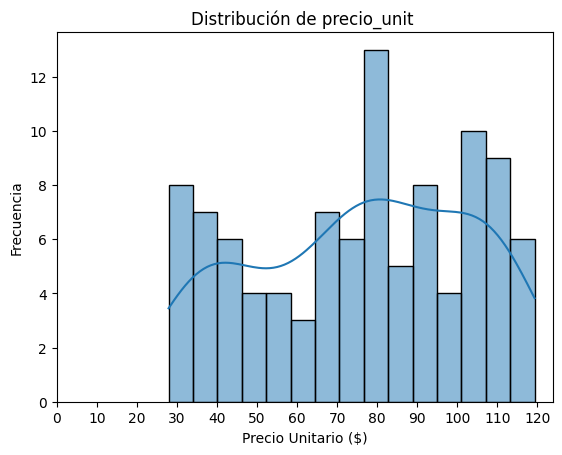

In [270]:
# Agregamos un plot para visualizar graficamente la distribución
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.histplot(df_adorno_pared["precio_unit"], bins=15, kde=True, edgecolor="black")
plt.title("Distribución de precio_unit ")
plt.xlabel("Precio Unitario ($)") # Updated x-axis label
plt.ylabel("Frecuencia")

# Set x-axis ticks to intervals of 10
plt.xticks(np.arange(0, df_adorno_pared["precio_unit"].max() + 10, 10))

plt.show()

In [271]:
# Calculate the 30th percentile of 'precio_unit'
q33_precio_adorno_pared = df_adorno_pared["precio_unit"].quantile(0.33)

print(f"The 33th percentile of the price for 'Adorno de pared' is: {q33_precio_adorno_pared:.2f}")

# Calculate the 70th percentile of 'precio_unit'
q66_precio_adorno_pared = df_adorno_pared["precio_unit"].quantile(0.66)
print(f"The 66th percentile of the price for 'Adorno de pared' is: {q66_precio_adorno_pared:.2f}")

The 33th percentile of the price for 'Adorno de pared' is: 65.67
The 66th percentile of the price for 'Adorno de pared' is: 90.64


In [278]:
import pandas as pd

# Define the bins (cut-off points)
bins = [25, 66, 91, 120]

# Define the labels for the ranges
labels = ['25-66', '66-91', '91-120']

# Create a new column 'precio_range' by stratifying 'precio_unit' into the defined bins
df_adorno_pared['precio_range'] = pd.cut(df_adorno_pared['precio_unit'], bins=bins, labels=labels, right=False)

# Display the count of items in each price range
display(df_adorno_pared['precio_range'].value_counts())

# Display the first few rows with the new column
display(df_adorno_pared.head(15))

,count
precio_range,
91-120,34
25-66,33
66-91,33


,id_venta,producto,precio_unit,cantidad,fecha_venta,categoria,precio_range
1478,410,Adorno de pared,109.64,3,2024-06-21,Decoración,91-120
2428,620,Adorno de pared,92.16,4,2024-10-21,Decoración,91-120
699,780,Adorno de pared,79.13,7,2024-03-21,Decoración,66-91
257,50,Adorno de pared,83.10,5,2024-01-31,Decoración,66-91
112,260,Adorno de pared,101.48,9,2024-01-15,Decoración,91-120
1151,460,Adorno de pared,93.62,6,2024-05-11,Decoración,91-120
2412,440,Adorno de pared,113.49,2,2024-10-17,Decoración,91-120
693,950,Adorno de pared,116.42,6,2024-03-20,Decoración,91-120
2774,640,Adorno de pared,110.44,7,2024-12-02,Decoración,91-120
1128,1000,Adorno de pared,74.64,11,2024-05-08,Decoración,66-91


In [291]:
nLenght = df_adorno_pared.shape[0]
rango1 = [0, 0]
rango2 = [0, 0]
rango3 = [0, 0]

#        df_adorno_pared.iat[ num_fila, num_col ]  con indice= 0
# print( df_adorno_pared.iat[0, 2])

for i in range(nLenght):
    pu = df_adorno_pared.iat[i, 2]
    nomP = df_adorno_pared.iat[i, 1]
    if pu >= 25 and pu <=66:
        rango1[0] += pu
        rango1[1] += 1
        df_adorno_pared.iat[i, 1] = nomP + "-R1"

    elif pu > 66 and pu <=91:
        rango2[0] += pu
        rango2[1] += 1
        df_adorno_pared.iat[i, 1] = nomP + "-R2"

    elif pu > 91 and pu <=120:
        rango3[0] += pu
        rango3[1] += 1
        df_adorno_pared.iat[i, 1] = nomP + "-R3"

media_rango1 = rango1[0]/rango1[1]
media_rango2 = rango2[0]/rango2[1]
media_rango3 = rango3[0]/rango3[1]

print(f"media_rango1 : {media_rango1:.2f}")
print(f"media_rango2 : {media_rango2:.2f}")
print(f"media_rango3 : {media_rango3:.2f}")



media_rango1 : 44.39
media_rango2 : 78.29
media_rango3 : 105.74


In [292]:
display(df_adorno_pared.head(15))

,id_venta,producto,precio_unit,cantidad,fecha_venta,categoria,precio_range
1478,410,Adorno de pared-R3,109.64,3,2024-06-21,Decoración,91-120
2428,620,Adorno de pared-R3,92.16,4,2024-10-21,Decoración,91-120
699,780,Adorno de pared-R2,79.13,7,2024-03-21,Decoración,66-91
257,50,Adorno de pared-R2,83.10,5,2024-01-31,Decoración,66-91
112,260,Adorno de pared-R3,101.48,9,2024-01-15,Decoración,91-120
1151,460,Adorno de pared-R3,93.62,6,2024-05-11,Decoración,91-120
2412,440,Adorno de pared-R3,113.49,2,2024-10-17,Decoración,91-120
693,950,Adorno de pared-R3,116.42,6,2024-03-20,Decoración,91-120
2774,640,Adorno de pared-R3,110.44,7,2024-12-02,Decoración,91-120
1128,1000,Adorno de pared-R2,74.64,11,2024-05-08,Decoración,66-91


In [ ]:
# @title
'''
# Calculate the sum and count for each range using boolean indexing

rango1_data = df_adorno_pared[df_adorno_pared['precio_range'] == '25-66']
rango1_sum = rango1_data['precio_unit'].sum()
rango1_count = rango1_data.shape[0]

rango2_data = df_adorno_pared[df_adorno_pared['precio_range'] == '63-93']
rango2_sum = rango2_data['precio_unit'].sum()
rango2_count = rango2_data.shape[0]

rango3_data = df_adorno_pared[df_adorno_pared['precio_range'] == '93-120']
rango3_sum = rango3_data['precio_unit'].sum()
rango3_count = rango3_data.shape[0]


print(f"Range 25-66: Sum = {rango1_sum:.2f}, Count = {rango1_count}, Average = {(rango1_sum / rango1_count):.2f}")
print(f"Range 63-93: Sum = {rango2_sum:.2f}, Count = {rango2_count}, Average = {(rango2_sum / rango2_count):.2f}")
print(f"Range 93-120: Sum = {rango3_sum:.2f}, Count = {rango3_count}, Average = {(rango3_sum / rango3_count):.2f}")
'''


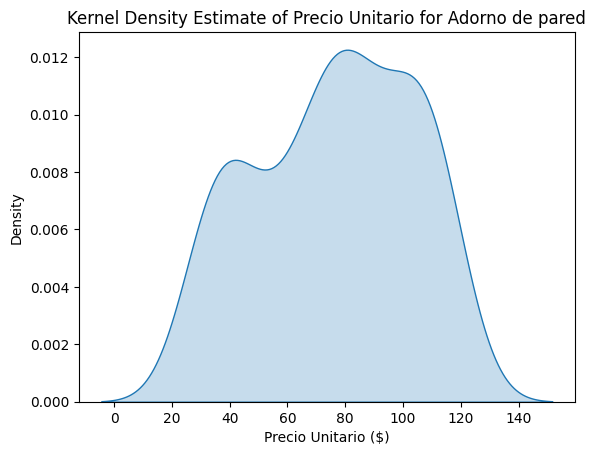

In [258]:
# @title
'''
import seaborn as sns
import matplotlib.pyplot as plt

# Create a KDE plot
sns.kdeplot(df_adorno_pared["precio_unit"], fill=True)
plt.title("Kernel Density Estimate of Precio Unitario for Adorno de pared")
plt.xlabel("Precio Unitario ($)")
plt.ylabel("Density")
plt.show()
'''

In [328]:
df_marketing.info()
df_marketing.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id_campanha   90 non-null     int64         
 1   producto      90 non-null     object        
 2   canal         90 non-null     object        
 3   costo         90 non-null     float64       
 4   fecha_inicio  90 non-null     datetime64[ns]
 5   fecha_fin     90 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 4.3+ KB


,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,Adorno de pared,TV,4.81,2024-03-20,2024-05-03
1,12,Tablet,RRSS,3.40,2024-03-26,2024-05-13
2,32,Lámpara de mesa,Email,5.54,2024-03-28,2024-04-20
3,21,Smartphone,RRSS,6.37,2024-03-29,2024-05-16
4,58,Alfombra,Email,4.25,2024-03-31,2024-05-05


In [340]:
df_marketing2 = df_marketing.sort_values(by="producto", ascending=True)
df_marketing2.info()
# df_canales = df_marketing.copy()
# df_canales.head()
df_marketing2.head(21)

<class 'pandas.core.frame.DataFrame'>
Index: 90 entries, 0 to 86
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id_campanha   90 non-null     int64         
 1   producto      90 non-null     object        
 2   canal         90 non-null     object        
 3   costo         90 non-null     float64       
 4   fecha_inicio  90 non-null     datetime64[ns]
 5   fecha_fin     90 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 4.9+ KB


,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,Adorno de pared,TV,4.81,2024-03-20,2024-05-03
8,44,Adorno de pared,Email,5.08,2024-04-13,2024-05-10
70,14,Adorno de pared,RRSS,4.16,2024-10-22,2024-12-21
84,28,Alfombra,RRSS,5.82,2024-11-27,2025-01-08
4,58,Alfombra,Email,4.25,2024-03-31,2024-05-05
41,88,Alfombra,TV,7.39,2024-07-25,2024-08-31
85,70,Aspiradora,TV,3.06,2024-12-13,2024-12-29
29,40,Aspiradora,Email,6.24,2024-06-24,2024-08-12
52,10,Aspiradora,RRSS,7.16,2024-08-19,2024-09-19
24,47,Auriculares,Email,4.19,2024-06-02,2024-07-22


In [332]:
df_ventas_final.head()

,id_venta,producto,precio_unit,cantidad,fecha_venta,categoria,valor_venta
0,792,Cuadro decorativo,69.94,5,2024-01-02,Decoración,349.70
1,811,Lámpara de mesa,105.10,5,2024-01-02,Decoración,525.50
2,1156,Secadora,97.96,3,2024-01-02,Electrodomésticos,293.88
3,1372,Heladera,114.35,8,2024-01-02,Electrodomésticos,914.80
4,1546,Secadora,106.21,4,2024-01-02,Electrodomésticos,424.84


In [388]:
#sort_values(by="producto", ascending=True)
#df_producto.drop()
#df_producto = pd.DataFrame( df_ventas_final["producto"].unique(), columns=["prod_name"])
df_producto = df_producto.sort_values(by="prod_name", ascending=True).reset_index(drop=True)

# re-indexamos
df_producto["prod_id"] = df_producto.index

# reordenamos
df_producto = df_producto[["prod_id", "prod_name"]]

# df_producto.columns = ['ProdID', 'ProdName', 'CatID', 'CatName']

#df_producto["prodID"] = df_producto.index

df_producto.head()

,prod_name,prod_id
0,Adorno de pared,0
1,Alfombra,1
2,Aspiradora,2
3,Auriculares,3
4,Batidora,4


In [391]:
# Create a DataFrame with unique product names and their categories from df_ventas_final
df_producto = df_ventas_final[["producto", "categoria"]].drop_duplicates().reset_index(drop=True)

# Rename columns to match the requested names
df_producto.rename(columns={"producto": "prod_name", "categoria": "cat_name"}, inplace=True)

# Sort the DataFrame alphabetically by 'prod_name'
df_producto = df_producto.sort_values(by="prod_name", ascending=True).reset_index(drop=True)

# Add a 'ProdID' column with the index values (which are now ordered alphabetically by product name)
df_producto["prod_id"] = df_producto.index

# Create a unique 'cat_id' for each category
df_producto["cat_id"] = df_producto["cat_name"].astype('category').cat.codes + 1

# Reorder columns for clarity
df_producto = df_producto[["prod_id", "prod_name", "cat_id", "cat_name"]]

# Display the new DataFrame
display(df_producto.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   prod_id    30 non-null     int64 
 1   prod_name  30 non-null     object
 2   cat_id     30 non-null     int8  
 3   cat_name   30 non-null     object
dtypes: int64(1), int8(1), object(2)
memory usage: 882.0+ bytes


None

In [392]:
# Display the new DataFrame
display(df_producto.head(30))

,prod_id,prod_name,cat_id,cat_name
0,0,Adorno de pared,1,Decoración
1,1,Alfombra,1,Decoración
2,2,Aspiradora,2,Electrodomésticos
3,3,Auriculares,3,Electrónica
4,4,Batidora,2,Electrodomésticos
5,5,Cafetera,2,Electrodomésticos
6,6,Candelabro,1,Decoración
7,7,Consola de videojuegos,3,Electrónica
8,8,Cortinas,1,Decoración
9,9,Cuadro decorativo,1,Decoración
